$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\bf R}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
$$

# Maxwell's equations with finite element exterior calculus

## Problem formulation

The aim of this notebook is to explain the finite element discretization of Maxwell's equations based on finite element exterior calculus (FEEC). This method is based on the de Rham complex of finite element spaces: 

<img src="pics/deRham.png" width="550"/> 

This complex is used in the discritzation of Maxwell's equations for the electric field $\bold E$ and the magnetic field $\bold B$:

$$
\ba
 \frac{1}{c^2} \pder{\bold E}{t} - \curl \bold B &= - \mu_0\bold j &&\qquad\quad\tn{(Ampère)} \,, \label{ampere}
 \\[1mm]
 \pder{\bold B}{t} + \curl \bold E &= 0 &&\qquad\quad\tn{(Faraday)} \,,
 \\[1.5mm]
 \div \bold E &= \frac{\varrho}{\eps_0} &&\qquad\quad\tn{(Gauss\,1)} \,, \label{gauss}
 \\[2mm]
 \div \bold B &= 0 &&\qquad\quad\tn{(Gauss\,2)} \,. \label{divB}
\ea
$$

Here, $\bold j$ and $\varrho$ are the given sources, namely the current density and the charge denstiy, respectively. Natural constants are the speed of light $c$, the magnetic constant $\mu_0$ and the dielectric constant $\eps_0$, where $1/c^2 = \eps_0\mu_0$. Taking the divergence of Ampère's law \eqref{ampere}, using that $\div\curl = 0$ and inserting Gauss' law \eqref{gauss} yields

$$
\be
 \pder{\varrho}{t} + \div \bold j = 0\,. \label{charge}
\ee
$$

This is a solvability condition for Maxwell's equations, called "conservation of charge". On the other hand, taking the time derivative of the Gauss law \eqref{gauss}, equation \eqref{charge} implies

$$
\be \label{alltimes}
 \dt{} \left( \div \bold E - \frac{\varrho}{\eps_0} \right) =  \frac{1}{\eps_0\mu_0}\, \div \curl \bold B - \frac{1}{\eps_0} \div \bold j - \frac{1}{\eps_0} \pder{\varrho}{t} = 0\,,
\ee
$$

Similarly,

$$
\be
 \dt{}\, \div \bold B = - \div \curl \bold E = 0\,,
 \ee
$$

which means that the two Gauss laws are satisfied at all times provided that they are satisfied at the initial time. The commuting diagram property of the deRham complex allows for numerical schemes that translate this property to the discrete level exactly (up to machine precision).

Let us start with the one dimensional case (1D). For this we assume that variations of $\bold E$ and $\bold B$ occurr only with respect to the $x$-direction, hence

$$
\be
 \grad = \begin{pmatrix} \pder{}{x} \\ 0 \\ 0  \end{pmatrix} \,,\qquad \curl \bold E = \begin{pmatrix} 0 \\ -\pder{E_z}{x} \\ \pder{E_y}{x} \end{pmatrix}\,,\qquad \div \bold E = \pder{E_x}{x}\,.
\ee
$$

Moreover, let us assume $E_z = B_x = B_y = 0$ and denote $E := E_y$, $j:= j_y$ and $B:= B_z$. Maxwell's equations then read

$$
\ba
 &\frac{1}{c^2} \pder{E_x}{t} = - \mu_0 j_x &&\qquad\quad\tn{(Ampère\,first\,component)} \,, \label{ampere:1Dx}
 \\[1mm]
 &\frac{1}{c^2} \pder{E}{t} + \pder{B}{x} = - \mu_0 j &&\qquad\quad\tn{(Ampère\,second\,component)} \,, \label{ampere:1D}
 \\[1mm]
 &\pder{B}{t} + \pder{E}{x} = 0 &&\qquad\quad\tn{(Faraday)} \,. \label{faraday:1D}
\ea
$$

We assume the domain to be $\Omega = (a,b)$ and suppose homogeneous Dirichlet boundary conditions for $E$ and periodic conditions for $E_x$ and $B$. In order to obtain a weak formulation of \eqref{ampere:1Dx}-\eqref{faraday:1D} we multiply by testfunctions $F_x$, $F$ and $C$ and integrate over $\Omega$:

$$
\ba
 &\frac{1}{c^2} \int_a^b \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_a^b j_x F_x\,\tn d x\,, \label{int:1}
 \\[1mm]
 &\frac{1}{c^2} \int_a^b \pder{E}{t} F\,\tn d x + \int_a^b \pder{B}{x} F\,\tn d x = - \mu_0 \int_a^b j \,F\,\tn d x\,, 
 \\[1mm]
 &\int_a^b \pder{B}{t} C\,\tn d x + \int_a^b \pder{E}{x} C\,\tn d x = 0\,. \label{int:3}
\ea
$$

There are multiple possibilities to use this for a weak formulation of \eqref{int:1}-\eqref{int:3}. We choose the following: find $(E_x,E,B)\in H^1\times H^1_0 \times L^2$ such that

$$
\ba
 &\frac{1}{c^2} \int_a^b \pder{E_x}{t} F_x\,\tn d x = - \mu_0 \int_a^b j_x F_x\,\tn d x \qquad &&\forall\, F_x \in H^1\,, \label{weak:1}
 \\[1mm]
 &\frac{1}{c^2} \int_a^b \pder{E}{t} F\,\tn d x - \int_a^b B\,\pder{F}{x} \,\tn d x = - \mu_0 \int_a^b j \,F\,\tn d x \qquad &&\forall\, F \in H^1_0\,, 
 \\[1mm]
 &\int_a^b \pder{B}{t} C\,\tn d x + \int_a^b \pder{E}{x} C\,\tn d x = 0 \qquad &&\forall\, C \in L^2\,. \label{weak:3}
\ea
$$

Remark that we intgrated by parts in the second equation in order to obtain a well defined weak formulation. 

## Discretization

The problem \eqref{weak:1}-\eqref{weak:3} contains only first order derivatives. Our aim is to choose solution spaces that satisfy a commuting diagram. A simpler 1D version of the above deRham complex reads as follows:

<img src="pics/deRham1D.png" width="220"/>

The projectors $\Pi_0$ and $\Pi_1$ must be chosen such that the diagram is commuting. In particular, for the discrete solution spaces we have $V_0 \subset H^1_0$ and $V_1 \subset L^2$ with $\dim V_0 = N_0 <\infty$ and $\dim V_1 = N_1 < \infty$. The basis functions will be denoted by $(\varphi^0_i)_{1\leq i\leq N_0}$ and $(\varphi^1_i)_{1\leq i\leq N_1}$, respectively. For periodic boundary conditions we consider a similar diagram with the appropriate spaces and denote everything with a tilde, for example, $\tilde V_0$. The discrete version of problem \eqref{weak:1}-\eqref{weak:3} reads: find $(E_{x,h},E_h,B_h)\in \tilde V_0\times V_0 \times V_1$ such that

$$
\ba
 &\frac{1}{c^2} \int_a^b \pder{E_{x,h}}{t} F_{x,h}\,\tn d x = - \mu_0 \int_a^b (\tilde \Pi_0 j_x) F_{x,h}\,\tn d x \qquad &&\forall\, F_{x,h} \in \tilde V_0\,, \label{disc:1}
 \\[1mm]
 &\frac{1}{c^2} \int_a^b \pder{E_h}{t} F_h\,\tn d x - \int_a^b B_h\,\pder{F_h}{x} \,\tn d x = - \mu_0 \int_a^b (\Pi_0 j) \,F_h\,\tn d x \qquad &&\forall\, F_h \in V_0\,, 
 \\[1mm]
 &\int_a^b \pder{B_h}{t} C_h\,\tn d x + \int_a^b \pder{E_h}{x} C_h\,\tn d x = 0 \qquad &&\forall\, C_h \in V_1\,. \label{disc:3}
\ea
$$


We shall implement Lagrange finite elements ourselves and use Ahmed's library 'spl' for spline finite elements.



A first important step is to define the mesh over the domain $\Omega = (a,b)$. The domain will be split into $N_\tn{el}$ elements, denoted $\Omega_k$, such that $\Omega = \cup_{k = 1}^{N_\tn{el}} \Omega_k$ and $\Omega_k \cap \Omega_{k+1} = b_k$, where $(b_k)_{1\leq k\leq N_\tn{el}-1}$ denote the element interfaces (or boundaries). The domain boundaries are denoted by $b_0 = a$ and $b_{N_\tn{el}} = b$.  

The bases for $V_0$ and $V_1$ are most conveniently defined by means of a  reference element (or patch). The convention is to use $I = [-1, 1]$ as the patch and to define the mappings $F_k: I \to \Omega_k$, $s\in[-1,1]\mapsto x\in[b_{k-1}, b_k]$ and its inverse, respectively:

$$
 \ba
  x &= F_k(s) := b_{k-1} + \frac{s + 1}{2}(b_k - b_{k-1})\,, \label{F}
  \\[1mm]
  s &= F_k^{-1}(x) := \frac{2\,(x - b_{k-1})}{b_k - b_{k-1}} - 1\,. \label{Finv}
 \ea
$$

Lagrange shape functions (polynomials) of degree $d$ will be created on the reference element from a series of knots $s_0 < \ldots < s_d \in I$. To each knot $s_n$ corresponds a shape function $\eta_n$, defined by

$$
\be
 \eta_n(s) := \prod_{m\neq n} \frac{s - s_m}{s_n - s_m}\,.
\ee
$$

Hence, $\eta_n(s_m) = \delta_{n,m}$.

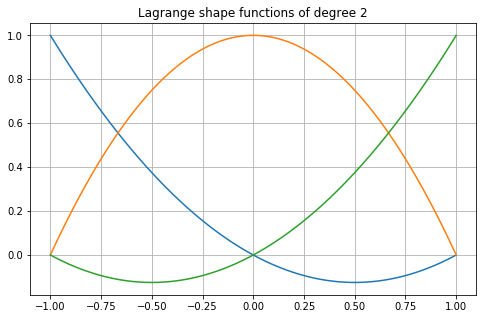

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import fixed_quad
import fembase as fem

degree = 2
# polynomial degree
shapefun = fem.LagrangeShape(np.linspace(-1, 1, degree + 1))
# check the docstring to see what this does
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
svec = np.linspace(-1,1,100)

for i in range(shapefun.d + 1):
    ax.plot(svec, shapefun.eta[i](svec))
    
ax.grid()
ax.set(title='Lagrange shape functions of degree ' + str(shapefun.d))
plt.show()

The actual basis functions $\varphi_i^0$ are related to the shape functions $\eta_n$ via the mappings $F_i$ from \eqref{F}-\eqref{Finv}. Since there are many different indices involved, let us clarify:

$$
\ba
 &\tn{elements:} &&\Omega_k, \quad k = 1,\ldots, N_\tn{el} \,,
 \\[2mm]
 &\tn{basis\,functions:} &&\varphi_i^0,\quad i = 0, \ldots, N_0 - 1\,,
 \\[2mm]
 &\tn{shape\,functions:} &&\eta_n,\quad n = 0,\ldots, d\,.
\ea
$$

Let us compute the number $N_0$ of Lagrange basis functions for the space $V_0$. In each element we have $d+1$ shape functions, such that the total number of degrees of freedom is $N_\tn{tot} = N_\tn{el}(d+1)$. In order to guarantee continuity, the element interfaces must be shared degrees of freedom belonging to both adjacent elements. Moreover, for homogeneous Dirichlet boundary conditions we remove the leftmost and the rightmost basis function, such that $N_0 = N_\tn{tot} - (N_\tn{el} - 1) - 2 = N_\tn{el} d - 1$ is the number of basis functions. The relation between the different indices is described as follows:

$$
 \begin{array}{c|c|c}
 \tn{element} & \tn{basis\,function} & \tn{shape\, function}
 \\[0mm]
 k & i & n
 \\[1mm] \hline
 1 & 0,\ldots, d - 1 & 1,\ldots,d 
 \\[1mm]
 2 & d-1,\ldots, 2d - 1 & 0,\ldots,d
 \\[1mm]
 \vdots & \vdots & \vdots
 \\[1mm]
 k & (k-1)d-1,\ldots, kd - 1 & 0,\ldots,d
 \\[1mm]
 \vdots & \vdots & \vdots
 \\[1mm]
 N_\tn{el} & (N_\tn{el} - 1)d-1,\ldots, N_\tn{el}d - 2 & 0,\ldots,d - 1
 \end{array}
$$

This means that in the first element we have the basis functions $\varphi_i^0$ with the indices $i = n - 1$ for $n = 1,\ldots,d$, in the $k$-th element ($1 < k < N_\tn{el}$) we have the basis functions $i = (k-1)d - 1 + n$ with $n = 0,\ldots,d$ and in the $N_\tn{el}$-th element we have the basis functions $i = (N_\tn{el} - 1)d-1 + n$ with $n = 0, \ldots, d-1$.

$$
 \varphi_i^0 = 
$$